# Machine Learning

# Understanding the problem

The data are already label encoded

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from keras.utils import plot_model
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import HyperModel
from keras_tuner.tuners import RandomSearch

# Gather and Understand the Data

## Load the data

In [2]:
# Define column names based on the descriptions in the initial rows of the file
column_names_new = ["First_Term_GPA", "Second_Term_GPA", "First_Language", "Funding", "School", "FastTrack", "Coop", "Residency", "Gender", "Previous_Education", "Age_Group", "High_School_Average", "Math_Score", "English_Grade", "FirstYearPersistence"]

# Import csv file into data - start on row 25 and assign the column name based on the defined value
data = pd.read_csv('../Student data.csv', skiprows=24, names=column_names_new, na_values="?")

## Basic data exploration

In [3]:
# Display the first 20 rows of the dataset for initial exploration
data.head(20)

,First_Term_GPA,Second_Term_GPA,First_Language,Funding,School,FastTrack,Coop,Residency,Gender,Previous_Education,Age_Group,High_School_Average,Math_Score,English_Grade,FirstYearPersistence
0,0.000000,0.000000,1.0,2,6,2,1,1,2,1.0,1.0,59.0,16.0,7.0,1
1,2.500000,2.000000,3.0,4,6,1,2,2,2,1.0,3.0,NaN,NaN,7.0,1
2,4.250000,3.923077,1.0,1,6,2,1,1,1,2.0,3.0,92.0,41.0,9.0,1
3,3.020833,2.321429,3.0,4,6,1,2,2,2,2.0,3.0,NaN,NaN,8.0,1
4,4.275000,4.326923,1.0,2,6,1,1,1,1,2.0,3.0,97.0,NaN,9.0,1
5,4.357143,4.326087,1.0,2,6,2,1,1,2,2.0,3.0,101.0,45.0,9.0,1
6,2.210526,1.375000,1.0,2,6,2,1,1,2,1.0,1.0,68.0,20.0,7.0,0
7,2.045455,2.961538,1.0,2,6,2,1,1,2,1.0,1.0,79.0,34.0,9.0,1
8,4.285714,3.608696,1.0,2,6,2,1,1,1,1.0,2.0,98.0,39.0,9.0,1
9,2.863636,1.300000,1.0,2,6,2,1,1,2,1.0,1.0,78.0,29.0,7.0,1


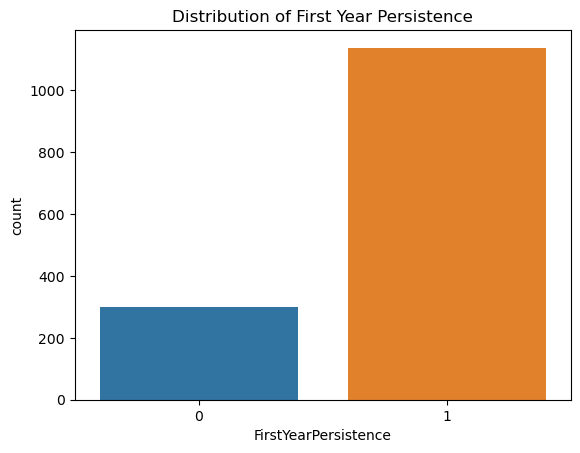

In [4]:
# Bar plot for target variable 'FirstYearPersistence'
sns.countplot(x='FirstYearPersistence', data=data)
plt.title('Distribution of First Year Persistence')
plt.show()

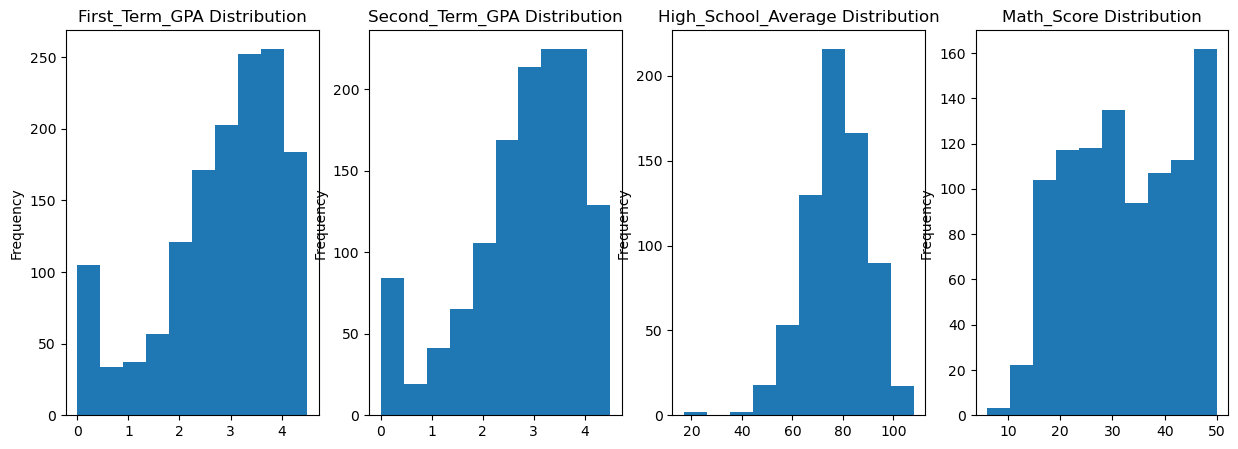

In [5]:
# Histogram for numerical features
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
data['First_Term_GPA'].plot(kind='hist', ax=axes[0], title='First_Term_GPA Distribution')
data['Second_Term_GPA'].plot(kind='hist', ax=axes[1], title='Second_Term_GPA Distribution')
data['High_School_Average'].plot(kind='hist', ax=axes[2], title='High_School_Average Distribution')
data['Math_Score'].plot(kind='hist', ax=axes[3], title='Math_Score Distribution')
plt.show()

In [6]:
# Check values with zero
(data == 0).astype(int).sum(axis=0) # Here we see that the categorical column prev education has 0 values which equates to null

First_Term_GPA           76
Second_Term_GPA          72
First_Language            0
Funding                   0
School                    0
FastTrack                 0
Coop                      0
Residency                 0
Gender                    0
Previous_Education       88
Age_Group                 0
High_School_Average       0
Math_Score                0
English_Grade             0
FirstYearPersistence    299
dtype: int64

In [7]:
# Replace "0" with NaN values for categorical feature columns
data['Previous_Education'] = data['Previous_Education'].replace(0, np.nan)

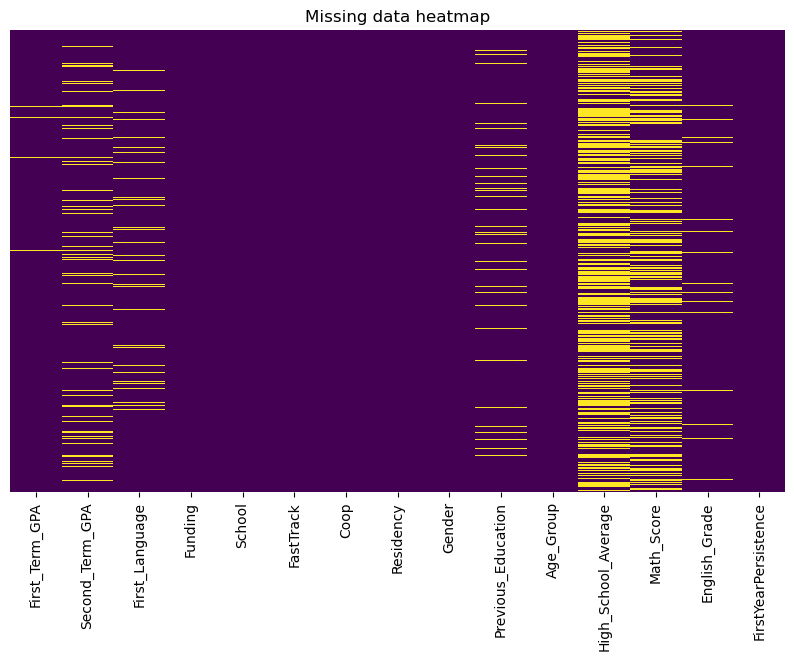

In [8]:
# visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing data heatmap')
plt.show()

# Data Preprocessing

In [9]:
# Drop columns with majority NaN values: High School Average (numeric), Math Score (numeric)
data.drop(["High_School_Average", "Math_Score"], axis=1, inplace=True)

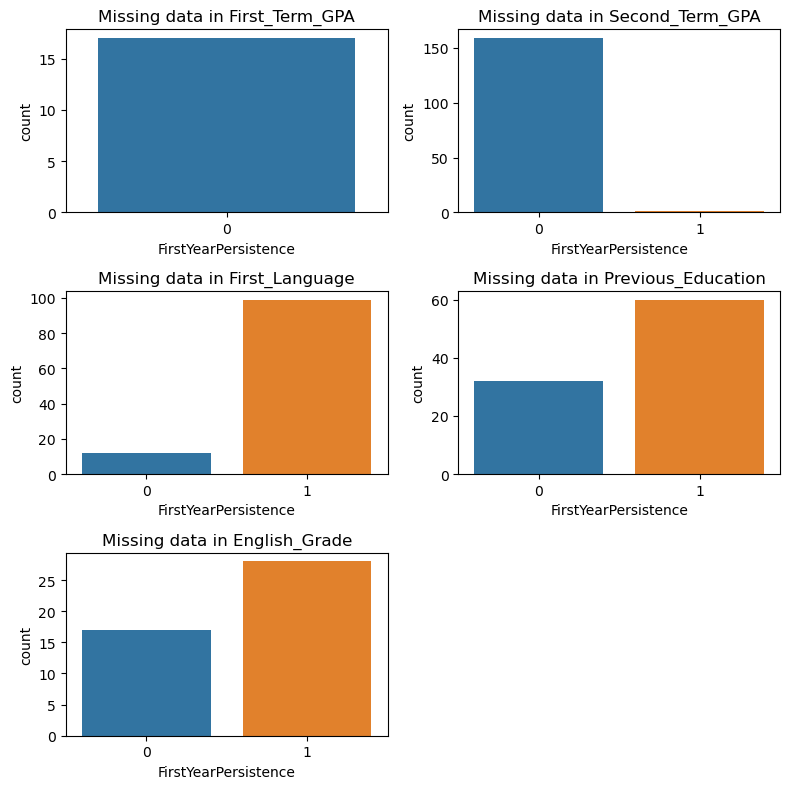

In [10]:
# Columns with nan rows
nan_columns = ['First_Term_GPA','Second_Term_GPA','First_Language','Previous_Education','English_Grade']

# Visualize the column with missing rows
plt.figure(figsize=(8, 8))

for i, column in enumerate(nan_columns):
    nan_rows = data[data[column].isnull()]
    
    plt.subplot(3, 2, i + 1)
    plt.title(f'Missing data in {column}')
    sns.countplot(x='FirstYearPersistence', data=nan_rows)

plt.tight_layout()
plt.show()

Missing data:1.  First term GPA and Second term GPA - the values seems to be not missing at random (MNAR). null has meaning2. # First Language - Impute with mod3.  # Previous Education and English Grade - Looks like it is missing in random | Rows can be remoed


In [11]:
# drop rows with NaN values for columns Previous Education and English Grade:
drop_rows_na_columns = ['Previous_Education', 'English_Grade']

# Drop rows where any of the specified columns have NaN values
cleaned_data = data.dropna(subset=drop_rows_na_columns)

# Reset the index
cleaned_data = cleaned_data.reset_index(drop=True)

# Separate Features and Label
X = cleaned_data.iloc[:,:-1]
y = cleaned_data.iloc[:,-1]

In [12]:
# Create an imputer object with a strategy of replacing with the most frequent value
mode_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to your data
X['First_Language'] = mode_imputer.fit_transform(X[['First_Language']])

# Create indicator variables for missing data in First and Second Term GPA
X['First_Term_GPA_missing'] = X['First_Term_GPA'].isnull().astype(int)
X['Second_Term_GPA_missing'] = X['Second_Term_GPA'].isnull().astype(int)

# Impute the missing data with 0
X['First_Term_GPA'] = X['First_Term_GPA'].fillna(0)
X['Second_Term_GPA'] = X['Second_Term_GPA'].fillna(0)

# Feature Selection

In [13]:
# Split the data into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=13)

# Use Random Forest's Feature Importance to select the important features
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=13, n_jobs=6, class_weight='balanced')
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

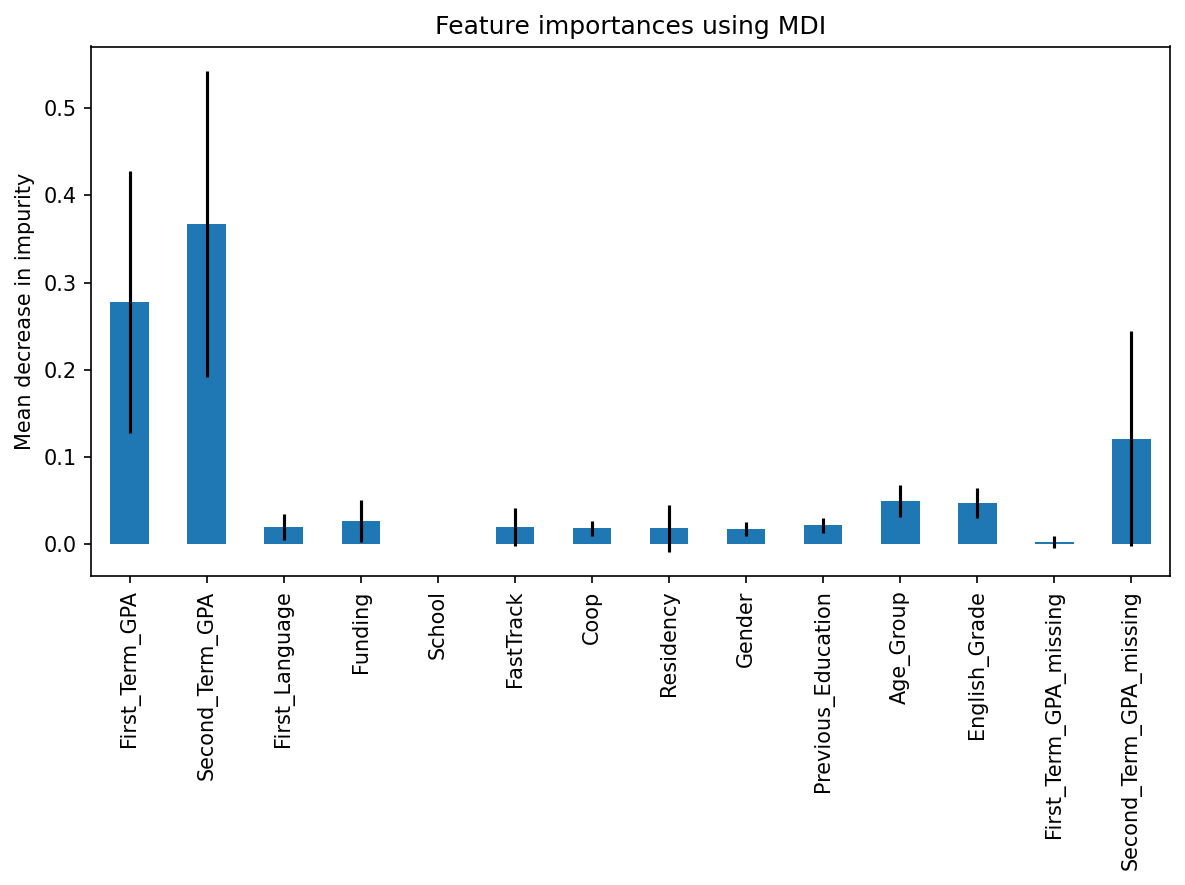

In [14]:
# Visualize the feature importance
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [15]:
# Create a list of features and the most important feature from the random forest feature importance result
feat_list = []
most_important_features = []
total_importance = 0

for feature in zip(X.columns, importances):
    feat_list.append(feature)
    total_importance += feature[1]

for feature in zip(X.columns, importances):
    #if feature[1] > .05:
    if feature[1] > .018:
        most_important_features.append(feature[0])

In [16]:
# Create DataFrame using the list
df_importance = pd.DataFrame(feat_list, columns =['FEATURE', 'IMPORTANCE']).sort_values(by='IMPORTANCE', ascending=False)
df_importance['CUMSUM'] = df_importance['IMPORTANCE'].cumsum()
print(df_importance)

                    FEATURE  IMPORTANCE    CUMSUM
1           Second_Term_GPA    0.367292  0.367292
0            First_Term_GPA    0.277642  0.644934
13  Second_Term_GPA_missing    0.120539  0.765473
10                Age_Group    0.048702  0.814175
11            English_Grade    0.046595  0.860770
3                   Funding    0.026436  0.887206
9        Previous_Education    0.020962  0.908168
2            First_Language    0.019393  0.927561
5                 FastTrack    0.019011  0.946572
7                 Residency    0.017614  0.964186
6                      Coop    0.017531  0.981717
8                    Gender    0.016602  0.998319
12   First_Term_GPA_missing    0.001681  1.000000
4                    School    0.000000  1.000000


In [17]:
# Most important feature selected are the features with more than .018 importance
print('Most Important Features:', most_important_features)
print('Number of Included Features =', len(most_important_features))

Most Important Features: ['First_Term_GPA', 'Second_Term_GPA', 'First_Language', 'Funding', 'FastTrack', 'Previous_Education', 'Age_Group', 'English_Grade', 'Second_Term_GPA_missing']
Number of Included Features = 9


In [18]:
# Subset data with important features
X_feature_selected = X[most_important_features]

# Feature Engineering

In [19]:
# revert the Encoded Label data to their original categorical values
# Define mappings as dictionaries
first_language_map = {1: "English", 2: "French", 3: "Other"}
funding_map = {
    1: "Apprentice_PS",
    2: "GPOG_FT",
    3: "Intl Offshore",
    4: "Intl Regular",
    5: "Intl Transfer",
    6: "Joint Program Ryerson",
    7: "Joint Program UTSC",
    8: "Second Career Program",
    9: "Work Safety Insurance Board"
}
boolean_map = {1: "Y", 2: "N"}
previous_education_map = {1: "HighSchool", 2: "PostSecondary"}
age_group_map = {
    1: "0 to 18",
    2: "19 to 20",
    3: "21 to 25",
    4: "26 to 30",
    5: "31 to 35",
    6: "36 to 40",
    7: "41 to 50",
    8: "51 to 60",
    9: "61 to 65",
    10: "66+"
}
second_term_missing_map = {0: "N", 1: "Y"}

# Create a copy of the slice to avoid the SettingWithCopyWarning
X_feature_selected = X_feature_selected.copy()

# Apply mappings
X_feature_selected.loc[:, 'First_Language'] = X_feature_selected['First_Language'].map(first_language_map).fillna("Other")
X_feature_selected.loc[:, 'Funding'] = X_feature_selected['Funding'].map(funding_map).fillna("Unknown")
X_feature_selected.loc[:, 'FastTrack'] = X_feature_selected['FastTrack'].map(boolean_map).fillna("Unknown")
X_feature_selected.loc[:, 'Previous_Education'] = X_feature_selected['Previous_Education'].map(previous_education_map).fillna("Unknown")
X_feature_selected.loc[:, 'Age_Group'] = X_feature_selected['Age_Group'].map(age_group_map).fillna("Unknown")
X_feature_selected.loc[:, 'Second_Term_GPA_missing'] = X_feature_selected['Second_Term_GPA_missing'].map(second_term_missing_map).fillna("Unknown")

In [20]:
# Identify the categorical columns excluding 'English_Grade'
categorical_columns = ['First_Language','Funding','FastTrack','Previous_Education','Age_Group','Second_Term_GPA_missing'] 

# One hot encode the categorical columns using pd.get_dummies
X_feature_encoded = pd.get_dummies(X_feature_selected, columns=categorical_columns) 

# Standardization
scaler = StandardScaler()
numeric_cols = ['First_Term_GPA','Second_Term_GPA']
X_feature_encoded[numeric_cols] = scaler.fit_transform(X_feature_encoded[numeric_cols])

In [21]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_feature_encoded, y, test_size=0.3, stratify=y, shuffle=True, random_state=13)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.3, stratify=y_test, shuffle=True, random_state=13)

# balance the dataset
smote = SMOTE(k_neighbors=2, random_state=13)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

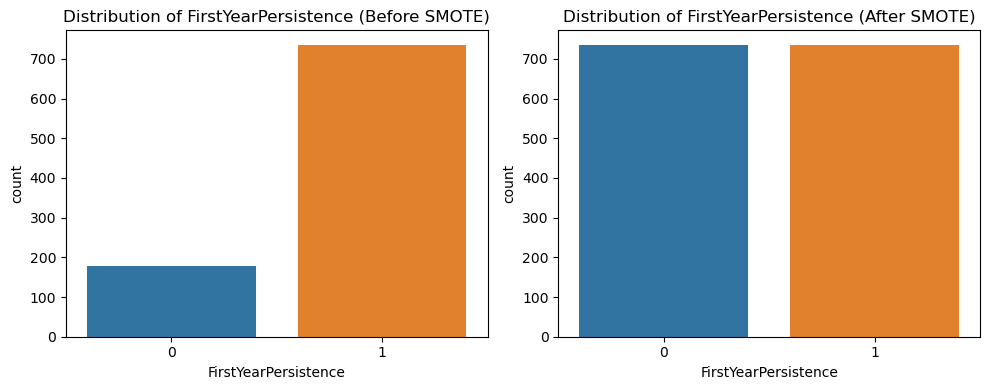

In [22]:
# Bar plot for target variable before and after SMOTE in subplots (1x2)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Before SMOTE
sns.countplot(x='FirstYearPersistence', data=pd.concat([X_train, y_train], axis=1), ax=axes[0])
axes[0].set_title('Distribution of FirstYearPersistence (Before SMOTE)')

# After SMOTE
sns.countplot(x='FirstYearPersistence', data=pd.concat([X_train_resampled, y_train_resampled], axis=1), ax=axes[1])
axes[1].set_title('Distribution of FirstYearPersistence (After SMOTE)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# Build and Train Neural Network Model

In [23]:
# Define the Model Builder Function
class MyHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = keras.Sequential()
        model.add(layers.Dense(hp.Int('units_layer_1', min_value=32, max_value=256, step=32),
                               activation='relu',
                               input_shape=(self.input_shape,)))
        model.add(layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(layers.Dense(hp.Int('units_layer_2', min_value=16, max_value=128, step=16),
                               activation='relu'))
        model.add(layers.Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(layers.Dense(1, activation='sigmoid'))  # Output layer remains the same

        # Compile model
        model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model

hypermodel = MyHyperModel(input_shape=25)

In [24]:
# Set Up and Run the Hyperparameter Tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,  # Set more trials for a more thorough search.
    executions_per_trial=1,
    directory='r_hypertuning',
    project_name='persist_tuning'
)

tuner.search_space_summary()

Reloading Tuner from r_hypertuning\persist_tuning\tuner0.json
Search space summary
Default search space size: 5
units_layer_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
units_layer_2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [25]:
# Start search
tuner.search(X_train_resampled, y_train_resampled,
             epochs=20,
             batch_size=64,
             validation_split=0.2)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [26]:
# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)

In [27]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1664      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


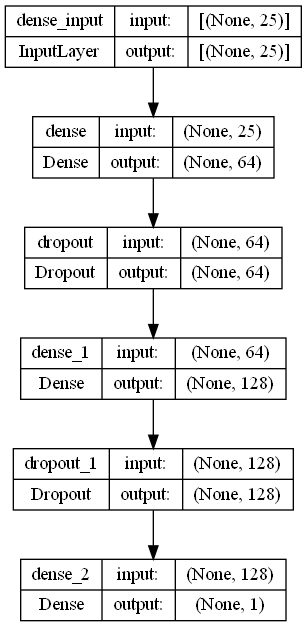

In [28]:
# Visualize the model summary
plot_model(model, show_shapes=True, show_layer_names=True)

In [29]:
# Train the model with 20 epochs
history = model.fit(X_train_resampled, y_train_resampled,
                    epochs=20,  # Or more, depending on the dataset and complexity
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/20


19/19 [==============================] - 1s 14ms/step - loss: 0.4615 - accuracy: 0.7798 - val_loss: 0.5736 - val_accuracy: 0.7789
Epoch 2/20
19/19 [==============================] - 0s 3ms/step - loss: 0.3220 - accuracy: 0.8827 - val_loss: 0.4432 - val_accuracy: 0.8061
Epoch 3/20
19/19 [==============================] - 0s 3ms/step - loss: 0.3057 - accuracy: 0.8767 - val_loss: 0.4109 - val_accuracy: 0.7755
Epoch 4/20
19/19 [==============================] - 0s 4ms/step - loss: 0.2814 - accuracy: 0.8861 - val_loss: 0.3993 - val_accuracy: 0.7891
Epoch 5/20
19/19 [==============================] - 0s 3ms/step - loss: 0.2643 - accuracy: 0.8929 - val_loss: 0.3838 - val_accuracy: 0.7857
Epoch 6/20
19/19 [==============================] - 0s 3ms/step - loss: 0.2728 - accuracy: 0.8886 - val_loss: 0.3224 - val_accuracy: 0.8129
Epoch 7/20
19/19 [==============================] - 0s 3ms/step - loss: 0.2545 - accuracy: 0.8971 - val_loss: 0.3125 - val_accuracy: 0.8299
Epoch 8/20
19/19 

# Evaluate the model

In [30]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'training lost: {loss}')
print(f'training accuracy: {accuracy}')

4/4 [==============================] - 0s 2ms/step - loss: 0.1941 - accuracy: 0.9153
training lost: 0.19405204057693481
training accuracy: 0.9152542352676392


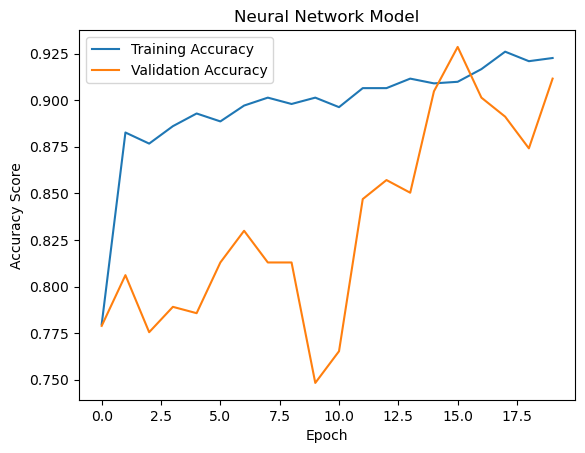

In [31]:
# Display the training vs validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.title('Neural Network Model')
plt.legend()
plt.show()

4/4 [==============================] - 0s 2ms/step


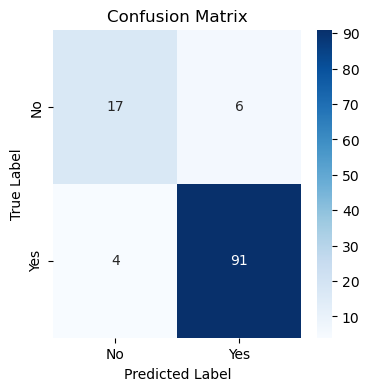

In [32]:
# Visualize the confusion Matrix
y_pred = np.around(model.predict(X_test)).ravel() 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

4/4 [==============================] - 0s 2ms/step


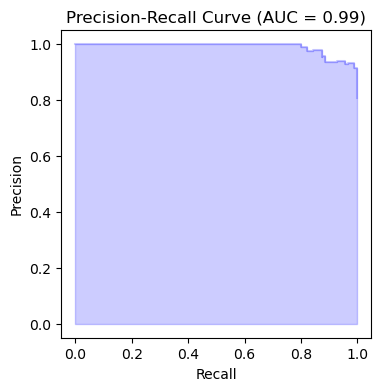

In [33]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict(X_test))
area = auc(recall, precision)

plt.figure(figsize=(4, 4))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC = {area:.2f})')
plt.show()

4/4 [==============================] - 0s 2ms/step


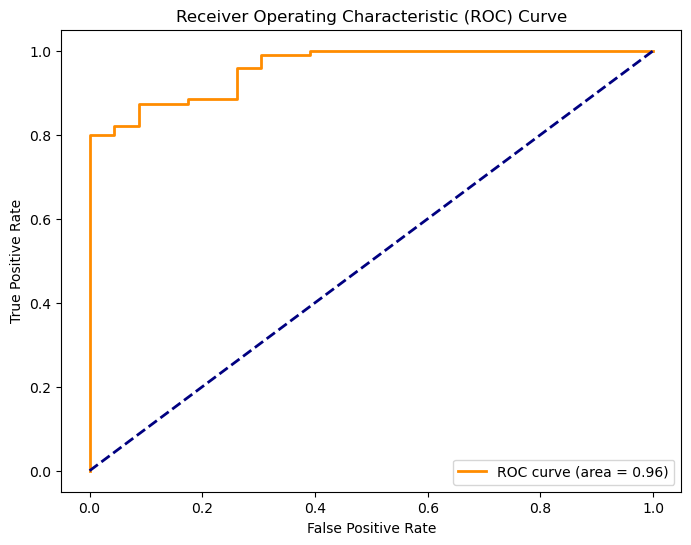

In [34]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
roc_auc = roc_auc_score(y_test, model.predict(X_test))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Testing the Model

In [35]:
import random
import json
# Randomly Select an input data
random_input_data = {
    'First_Term_GPA': round(random.uniform(0.0, 5.0), 5),
    'Second_Term_GPA': 'None' if random.choice([True, False]) else round(random.uniform(0.0, 5.0), 5),
    'First_Language': random.choice(['English', 'French', 'Other']),
    'Funding': random.choice(['Apprentice_PS', 'GPOG_FT', 'Intl Offshore', 'Intl Regular', 'Intl Transfer', 'Joint Program Ryerson', 'Joint Program UTSC', 'Second Career Program', 'Work Safety Insurance Board']),
    'FastTrack': random.choice(['Y', 'N']),
    'Previous_Education': random.choice(['HighSchool', 'PostSecondary']),
    'Age_Group': random.choice(['0 to 18', '19 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '51 to 60', '61 to 65', '66+']),
    'English_Grade': random.choice(['Level-130', 'Level-131', 'Level-140', 'Level-141', 'Level-150', 'Level-151', 'Level-160', 'Level-161', 'Level-170', 'Level-171', 'Level-180'])
}
pretty_data = json.dumps(random_input_data, indent=4)
print(pretty_data)

{
    "First_Term_GPA": 1.57351,
    "Second_Term_GPA": 3.9268,
    "First_Language": "English",
    "Funding": "Apprentice_PS",
    "FastTrack": "N",
    "Previous_Education": "PostSecondary",
    "Age_Group": "41 to 50",
    "English_Grade": "Level-140"
}


In [36]:
# Convert input data to DataFrame
input_df = pd.DataFrame([random_input_data])

In [37]:
# Check if Second_Term_GPA is None and process accordingly
input_df['Second_Term_GPA'] = pd.to_numeric(input_df['Second_Term_GPA'], errors='coerce')  # Convert non-numeric to NaN
input_df['Second_Term_GPA_missing'] = input_df['Second_Term_GPA'].isnull().apply(lambda x: 'Y' if x else 'N')
input_df['Second_Term_GPA'] = input_df['Second_Term_GPA'].fillna(0)

In [38]:
# Create map for English grades
english_grade_map = {
    "Level-130": 1,
    "Level-131": 2,
    "Level-140": 3,
    "Level-141": 4,
    "Level-150": 5,
    "Level-151": 6,
    "Level-160": 7,
    "Level-161": 8,
    "Level-170": 9,
    "Level-171": 10,
    "Level-180": 11 
}

# Map english grade to the ordinal encoding
input_df['English_Grade'] = input_df['English_Grade'].map(english_grade_map ).fillna("Unknown")

In [39]:
# Identify the categorical columns excluding 'English_Grade'
categorical_columns = ['First_Language','Funding','FastTrack','Previous_Education','Age_Group','Second_Term_GPA_missing'] 

In [40]:
# One hot encode the categorical columns using pd.get_dummies
input_df = pd.get_dummies(input_df, columns=categorical_columns) 

In [41]:
# Ensure all necessary columns are present, filling missing ones with 0 (for the one-hot encoded features)
for column in X_feature_encoded.columns:
    if column not in input_df.columns:
        input_df[column] = 0

In [42]:
# Remove any columns in input_df that are not in X_feature_encoded
columns_to_remove = [column for column in input_df.columns if column not in X_feature_encoded.columns]
input_df.drop(columns=columns_to_remove, inplace=True)

In [43]:
# Standardization
numeric_cols = ['First_Term_GPA','Second_Term_GPA']
input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])

In [44]:
# Make a prediction
prediction = model.predict(input_df)

# Print the prediction
print("Predicted probability:", prediction)

1/1 [==============================] - 0s 19ms/step
Predicted probability: [[0.8676845]]


In [45]:
# Since it's a binary classification, you can convert this probability to a class label
predicted_class = (prediction > 0.5).astype(int)

prediction_result = "Student will not Persist"

if predicted_class[0][0] == 1:
    prediction_result = "Student will Persist"

print(prediction_result)

Student will Persist


# Extract the model

In [46]:
from joblib import dump

dump(scaler, './models/scaler.pkl')
model.save("./models/model.keras")